In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def read_image(fname):
    gray_img = cv2.imread(fname, 0)    # gray image
    bgr_img = cv2.imread(fname)
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return gray_img, rgb_img

In [3]:
def gaussian_low_pass_filter(size_x, size_y, cutoff_ratio=0.5):
    H = np.zeros((size_x, size_y))
    cutoff = np.ceil(cutoff_ratio * 0.5 * size_x)
    if (size_x > size_y):
        cutoff = np.ceil(cutoff_ratio * 0.5 * size_y)
    center_x = int(size_x/2)
    center_y = int(size_y/2)
    for i in range(size_x):
        u = i-center_x
        for j in range(size_y):
            v = j-center_y
            H[i,j] = np.exp(-(u**2+v**2)/(2*(cutoff**2)))
#     print("low-pass-filter: {0}\n{1}".format(H.shape, H))
    return H

In [4]:
def get_magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, fshift

In [5]:
def img_back(fimage):
    fshift  = np.fft.ifftshift(fimage)
    img = np.fft.ifft2(fshift)
    img = img.real
    return img

In [42]:
def float_to_int(data):
    new_data = (data).astype(np.uint8)
    return new_data

In [43]:
def plot_img(img_1, img_2, camp=None):
    fig, ax = plt.subplots(1,2, figsize=[8, 6])
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].imshow(img_1, cmap = camp)
    ax[1].imshow(img_2, cmap = camp)

In [44]:
def cv_save(fname, img):
    cv2.imwrite(fname, img)

In [110]:
def down_sample(img):
    sub_img = np.zeros((int(img.shape[0]/2), int(img.shape[1]/2)))
    for i in range(0, img.shape[0], 2):
        if i+1>=img.shape[0]:
            break
        i1 = i
        i2 = i+1
        for j in range(0, img.shape[1], 2):
            if j+1>=img.shape[1]:
                break
            j1 = j
            j2 = j+1
            sub_img[int(i/2), int(j/2)] = (img[i1, j1]+img[i1, j2]+img[i2, j1]+img[i2, j2])/4
    return sub_img

In [98]:
def gaussian_pyramid(img, times, isFirst=False):
    img_spec, fshift = get_magnitude_spectrum(img)
    gaussian_filter = gaussian_low_pass_filter(img.shape[0], img.shape[1])
    gaussian_spec = img_spec * gaussian_filter
    gaussian_f = fshift * gaussian_filter
    if isFirst:
        cv_save('./task2/origin.jpg', img)
        plot_img(img, float_to_int(img_spec), 'gray')
    gaussian_img = img_back(gaussian_f)
    pyramid_img = down_sample(gaussian_img)
    pyramid_spec, _ = get_magnitude_spectrum(pyramid_img)
    cv_save('./task2/pyramid_'+times+'.jpg', float_to_int(pyramid_img))
    plot_img(float_to_int(pyramid_img), float_to_int(pyramid_spec), 'gray')
    return img, pyramid_img

In [85]:
def laplacian_pyramid(origin, expand):
    p_img = origin - expand
    img_spec, _ = get_magnitude_spectrum(p_img)
    plot_img(p_img, img_spec, 'gray')

shape0: 361	shape1: 410

shape0: 180	shape1: 205

shape0: 90	shape1: 102

shape0: 45	shape1: 51



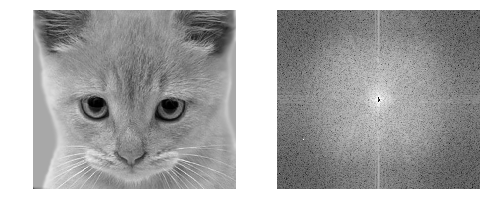

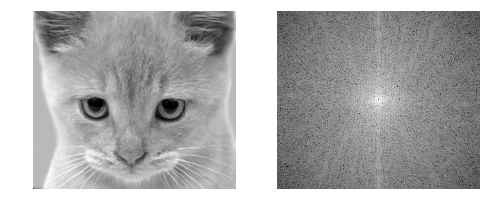

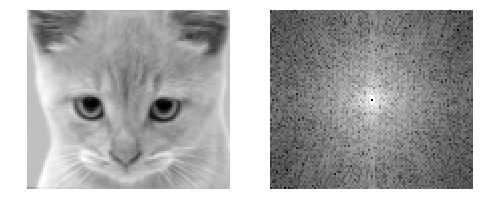

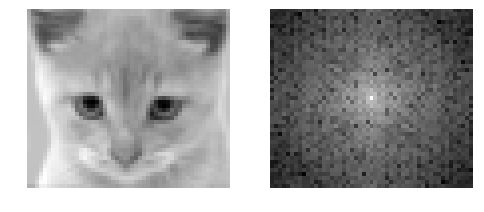

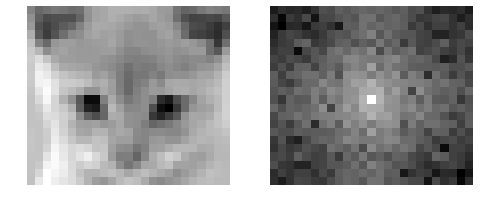

In [114]:
img, _ = read_image('./hw2_data/task1and2_hybrid_pyramid/cat.bmp')
origin, img = gaussian_pyramid(img, str(1), True)
for i in range(2, 5):
    origin, img = gaussian_pyramid(img, str(i), False)
# laplacian_pyramid(origin, img)